# 1. Introduction

### In this Guided Project, we'll:

* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

We'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this [paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

### Why is image classifcation a hard task?

* First, each image in a training set is high dimensional. **Each pixel in an image is a feature and a separate column.** This means that a 128 x 128 image has 16384 features.

* Second, **images are often downsampled to lower resolutions and transformed to grayscale (no color)**. This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. **This often results in a loss of detail that's available for training and pattern matching.**

* Third, the **features in an image don't have an obvious linear or nonlinear relationship** that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the **`models' ability to learn hierarchical representations`.** At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

* In the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. **Each successive layer uses weights from previous layers to try to learn more complex representations.**

# 2. Working With Image Data

* Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of **sklearn.datasets**. The **load_digits()** function returns a copy of the hand-written digits dataset from UCI.

* Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

## TODO:
* Import load_digits() from the sklearn.datasets package.
* Transform the NumPy 2D array into a pandas dataframe.
* Use matplotlib to visualize some of the images in the dataset.
  * Generate a scatter plot grid, with 2 rows and 4 columns.
  * In the first row:
    * Display the images corresponding to rows 0, 100, 200, and 300.
  * In the second row:
    * Display the images corresponding to rows 1000, 1100, 1200, and 1300.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

digits_data=load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
labels=pd.Series(digits_data['target'])
features=pd.DataFrame(digits_data['data'])

In [3]:
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [4]:
features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

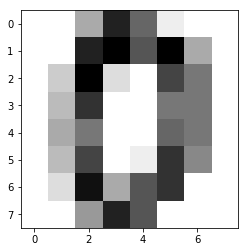

In [5]:
first_image=features.iloc[0]
np_image=first_image.values

np_image=np_image.reshape(8,8)

plt.imshow(np_image,cmap='gray_r')

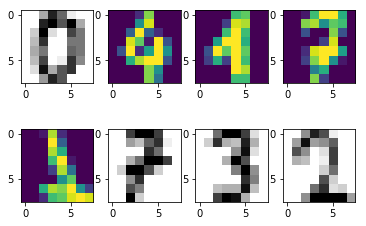

In [6]:
f,ax=plt.subplots(2,4)

ax[0,0].imshow(features.iloc[0].values.reshape(8,8),cmap='gray_r')
ax[0,1].imshow(features.iloc[100].values.reshape(8,8))
ax[0,2].imshow(features.iloc[200].values.reshape(8,8))
ax[0,3].imshow(features.iloc[300].values.reshape(8,8))

ax[1,0].imshow(features.iloc[1000].values.reshape(8,8))
ax[1,1].imshow(features.iloc[1200].values.reshape(8,8),cmap='gray_r')
ax[1,2].imshow(features.iloc[1300].values.reshape(8,8),cmap='gray_r')
ax[1,3].imshow(features.iloc[1400].values.reshape(8,8),cmap='gray_r')
plt.show()

# 3. K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, `k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model)`.

* Split up the data into train and test sets.
  * Setup a pipeline for testing and training k-nn models.
  * Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
  * Write a function named test() that tests the model.
  * Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
* Experiment with different values for k and plot the resulting classification accuracies.

In [7]:
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.5,random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(nneighbors,train_features,train_labels):
    knn=KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(train_features,train_labels)
    return knn
    
    
def test(model,test_features,test_labels):
    prediction=model.predict(test_features)
    train_test_df=pd.DataFrame()
    train_test_df['predicted_labels']=prediction
    train_test_df['correct_lables']=test_labels
    accuracy=sum(train_test_df['predicted_labels']==train_test_df['correct_lables'])/len(train_test_df)
    return accuracy


def cross_validate(k):
    fold_accuracies=[]
    kf=KFold(n_splits=4,random_state=2)
    for train_index,test_index in kf.split(features):
        train_features,test_features=features.loc[train_index],features.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        model=train(k,train_features,train_labels)
        accuracy=test(model,test_features,test_labels)
        fold_accuracies.append(accuracy)
        return fold_accuracies
    
    

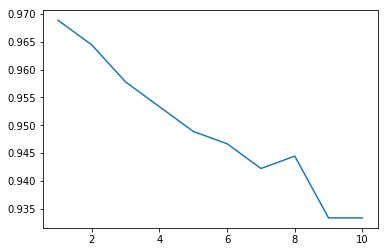

In [9]:
k_vs_accuracy=[]

for k in range(1,11):
    knn_fold_accuracies=cross_validate(k)
    k_vs_accuracy.append(np.mean(knn_fold_accuracies))
    
plt.plot(range(1,11),k_vs_accuracy)

# 4. Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

 * Use the [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) package from scikit-learn.

## TODO:
* Using 4-fold cross validation:

  * Train and test a neural network model using a single hidden layer of 8 neurons.
  * Train and test a neural network model using a single hidden layer of 16 neurons.
  * Train and test a neural network model using a single hidden layer of 32 neurons.
  * Train and test a neural network model using a single hidden layer of 64 neurons.
  * Train and test a neural network model using a single hidden layer of 128 neurons.
  * Train and test a neural network model using a single hidden layer of 256 neurons.
* Create a new Markdown cell summarizing what you saw.

  * Rank the performance of the models by the overall accuracies.
  * Which models, if any, start to overfit?
    * For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_nn(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [11]:
neuron_arch=[8,16,32,64,128]
neuron_vs_accuracy=[]

for neuron in neuron_arch:
    fold_accuracies=cross_validate_nn(neuron)
    neuron_vs_accuracy.append(np.mean(fold_accuracies))
    
neuron_vs_accuracy    

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.8992687453600594,
 0.9254355357584756,
 0.9259824300915614,
 0.9410034644889878,
 0.948236822568671]

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

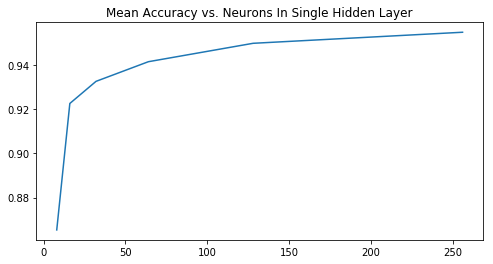

In [12]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

## Summary
It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

# 5. Neural Network With Two Hidden Layers

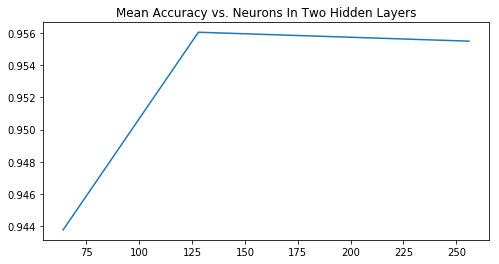

In [13]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate_nn(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [14]:
nn_two_accuracies

[0.943783716901757, 0.9560331601088841, 0.9554813165058154]

**Summary**

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

# 6. Neural Network With Three Hidden Layers

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(features):
        trrain_features, tesst_features = features.loc[train_index], features.loc[test_index]
        trrain_labels, tesst_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, trrain_features, trrain_labels)
        overall_accuracy = test(model, tesst_features, tesst_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

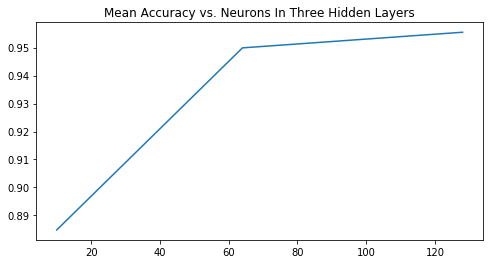

In [16]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

**Summary**

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.

**Here are some next steps to try:**

* Use the existing pipeline you've built to try other machine learning models:
  * Decision Tree Models
  * Random Forest Models
* Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.
* Experiment with different activation functions to see if the accuracies improve.
* Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
   * [Visualization of MLP Weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)